### Logistic Regression Implementation

In [238]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [239]:
from sklearn.datasets import make_classification

In [240]:
## create the dataset
X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [241]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107
...,...,...,...,...,...,...,...,...,...,...
995,1.538272,0.171629,0.075371,-0.957658,-1.066219,1.158096,-0.036964,0.123689,0.927871,-0.225003
996,-0.060266,0.095018,-0.271685,1.830560,0.219445,-0.341269,1.180088,-0.216876,-1.752938,-0.810152
997,0.675563,-0.538420,-1.299500,0.747835,1.733898,-0.268044,-0.520953,2.043336,0.947388,0.790354
998,2.629710,-2.452899,-1.359785,1.592065,0.854157,1.618828,0.621701,0.378898,-1.971894,-0.252250


In [242]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [243]:
# Model training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [244]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [245]:
y_pred=logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [246]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [247]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Hyperparameter Tuning And Cross Validation

In [248]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

In [249]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [250]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [251]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [252]:
grid.fit(X_train,y_train)

/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/pytho

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [253]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [254]:
grid.best_score_

0.9242857142857142

In [255]:
y_pred=grid.predict(X_test)

In [256]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Randomized SearchCV

In [257]:
from sklearn.model_selection import RandomizedSearchCV

In [258]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')


In [259]:
randomcv.fit(X_train,y_train)

/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/pytho

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [260]:
randomcv.best_score_

0.9228571428571428

In [261]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}

In [262]:
y_pred=randomcv.predict(X_test)

In [263]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9233333333333333
[[150   7]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       157
           1       0.95      0.89      0.92       143

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### Loagistic Regression For Multiclass Classification Problem

In [264]:
## create the dataset
X,y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)

In [265]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [266]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=15)

In [267]:
# Model training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [268]:
y_pred=logistic.predict(X_test)

In [269]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7833333333333333
[[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       105
           1       0.73      0.71      0.72        97
           2       0.72      0.85      0.78        98

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



### Logistic Regression for Imbalanced Dataset

In [270]:
# Genrates and plot a synthetic imbalanced classification dataset 
from collections import  Counter
from sklearn.datasets import make_classification

In [271]:
## imbalanced dataset 
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)


In [272]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [273]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

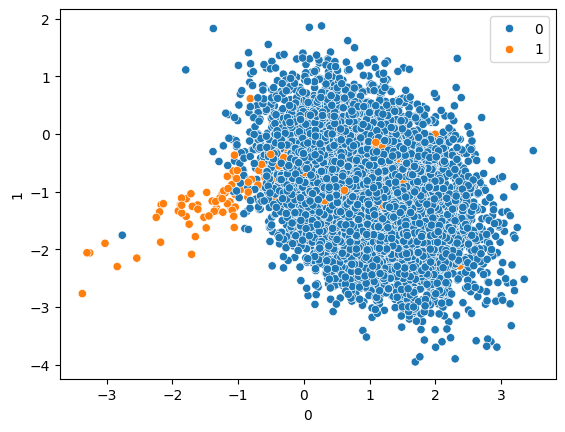

In [274]:
import pandas as pd 
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [276]:
## Hyperparameter tuning 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [277]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [278]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [279]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)


In [280]:
grid.fit(X_train,y_train)

/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shindesudeep/Desktop/MachineLearning-DeepLearning/ml_dl_env/lib/pytho

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [281]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [282]:
y_pred=grid.predict(X_test)

In [283]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.99
[[2459    3]
 [  22   16]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       0.84      0.42      0.56        38

    accuracy                           0.99      2500
   macro avg       0.92      0.71      0.78      2500
weighted avg       0.99      0.99      0.99      2500



### Logistic Regression With ROC curve and ROC AUC score



In [286]:
# roc curve and auc 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot

In [287]:
## generate 2 class dataset 
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [289]:
# Split the dataset into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [292]:
# Created a dummy model with default 0 as output 
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [293]:
## Lets Create Basic Logistic Model 
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [294]:
model_prob=model.predict_proba(X_test)

In [295]:
model_prob=model_prob[:,1]

In [296]:
# Lets calculate the score 
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [302]:
# calculate ROC Curves 
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold=roc_curve(y_test,model_prob)

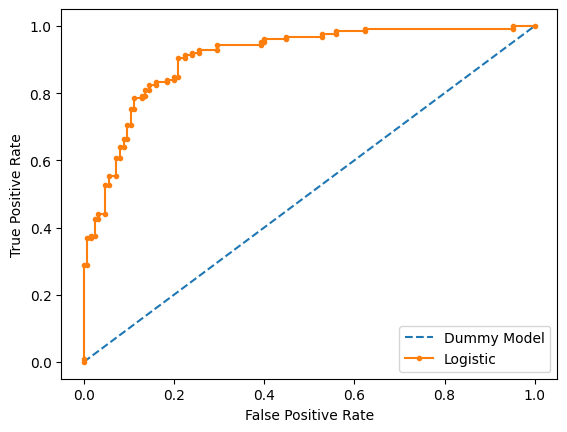

In [303]:
# plot the roc curve for the model 
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
#axis labels 
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend 
pyplot.legend()
# show the plot 
pyplot.show()

In [304]:
threshold

array([           inf, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

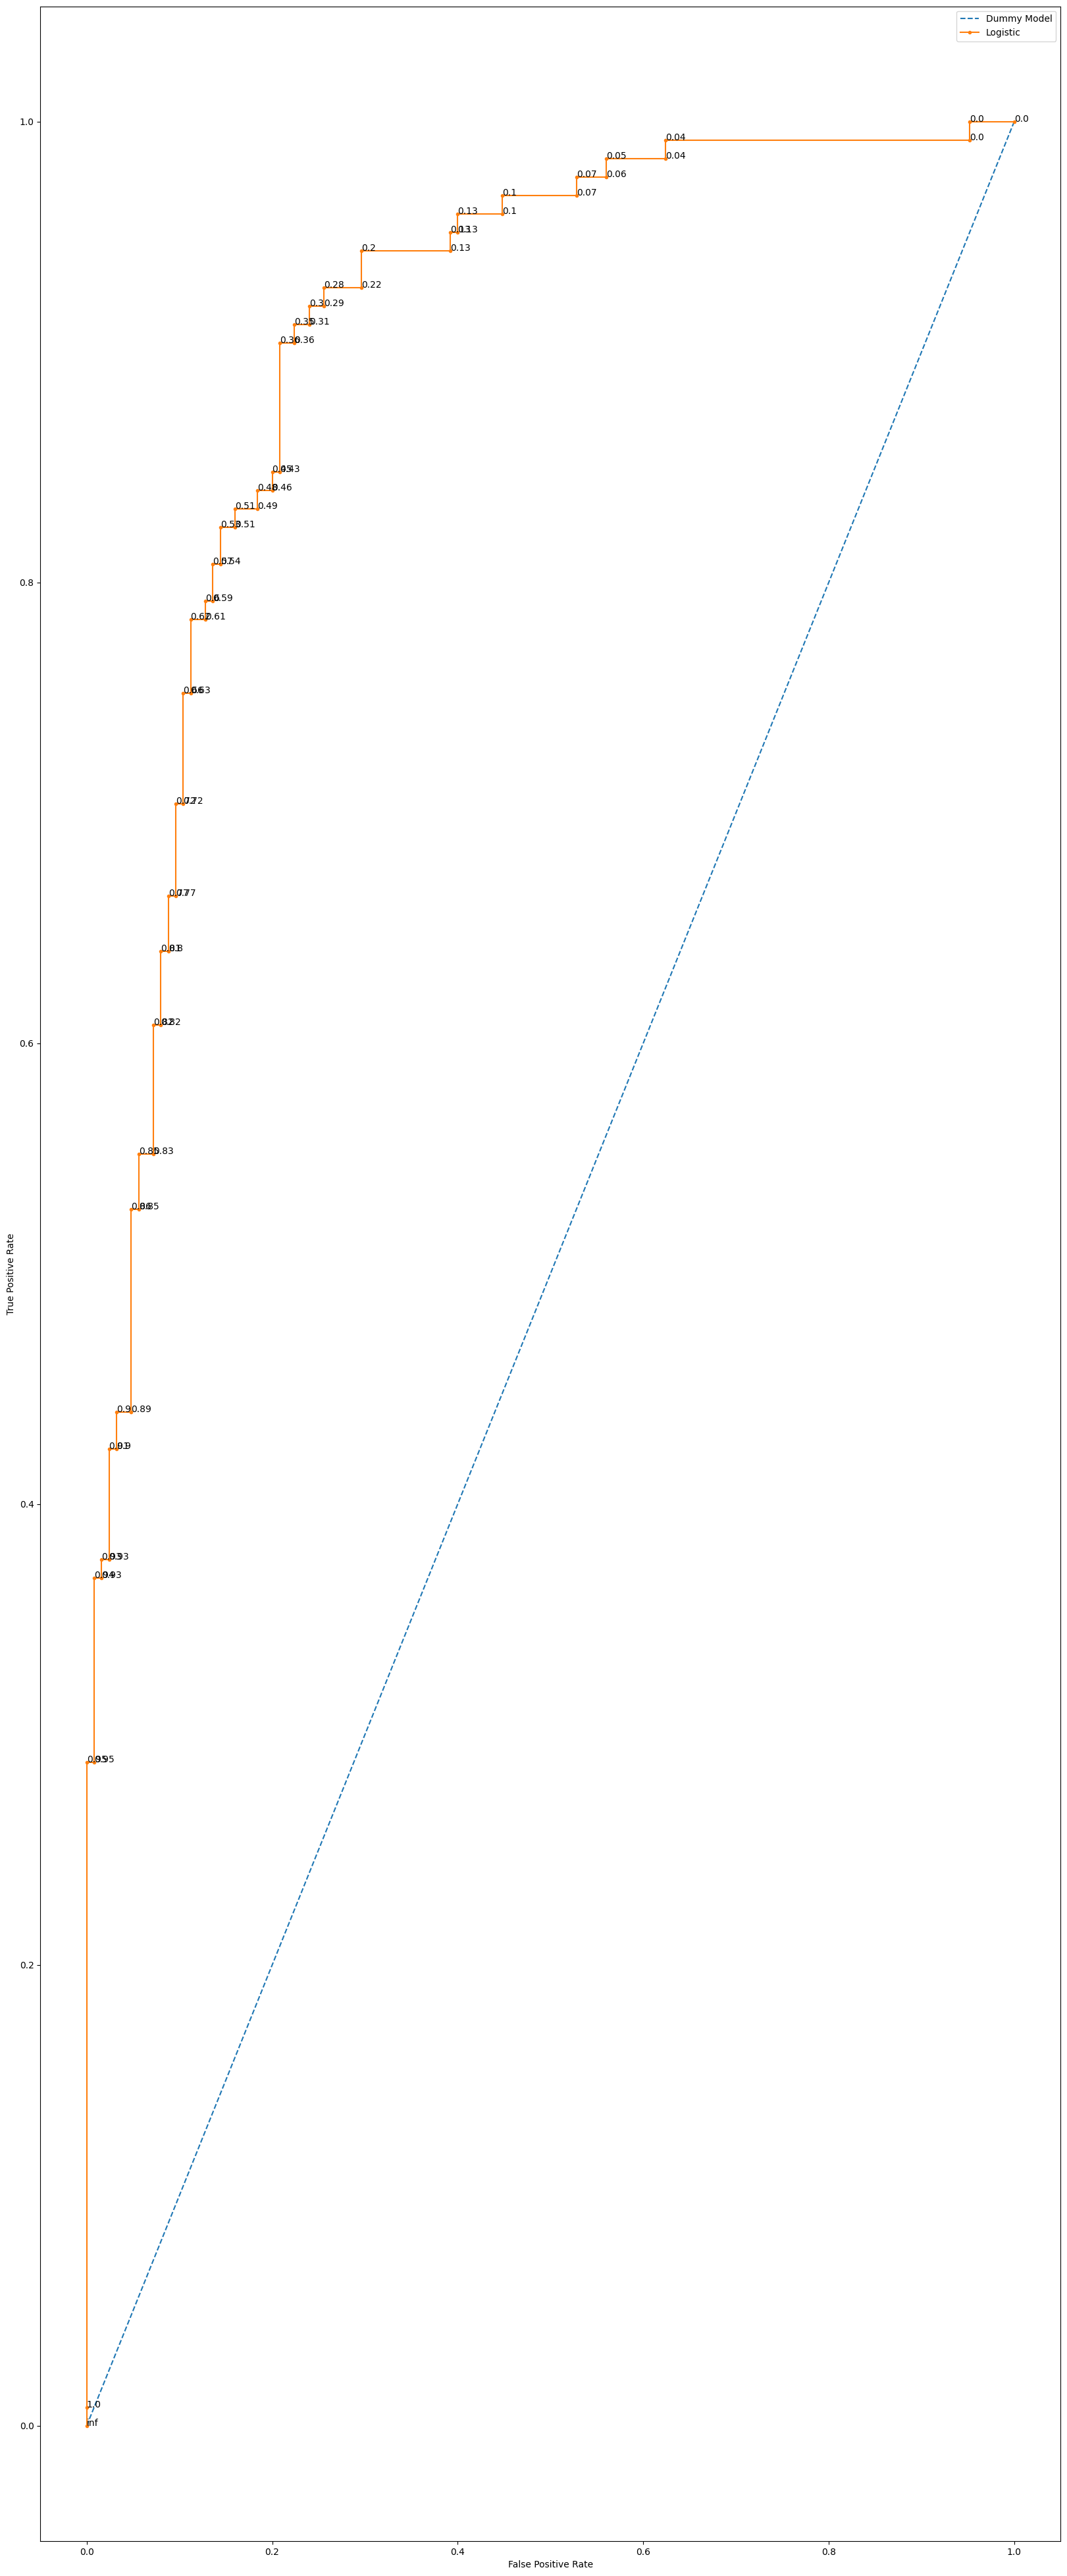

In [307]:
# plot the roc curve for the model 
import numpy as np 
fig=pyplot.figure(figsize=(20,50))

ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,threshold):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
# axis labels 
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend 
pyplot.legend()
# show the plot 
pyplot.show()